In [1]:
from ClustDenFunc.plotDenFunc import *
from ClustDenFunc.SimDat import simDatabnorm, splitTrainTest

from ClustDenFunc.ClustDenFunc import *

setupPlotting()

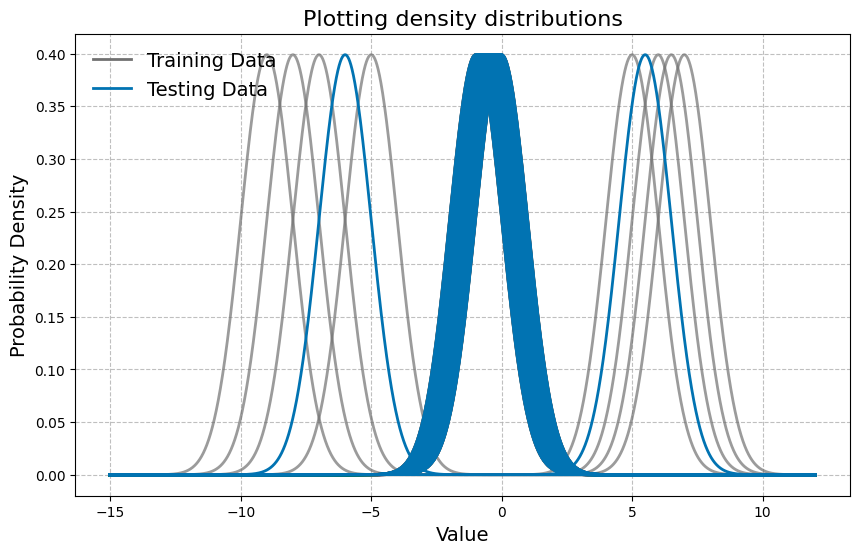

In [11]:
mus = [
    np.linspace(-9, -5, num=5),  
    np.linspace(-1, 0, num=5*90), 
    np.linspace(5, 7, num = 5)
]
sigs = [1, 1, 1]
grid = np.linspace(-15, 12, 10000)
Data, trueLabels = simDatabnorm(mus, sigs, grid)


train_df,  test_df, train_lbs, test_lbs = splitTrainTest(Data, trueLabels, stratify = trueLabels)


# plotRaw(Data, grid)
plotTrainTest(train_df,  test_df, grid)
# plotTarget(train_df, train_lbs, grid)



Iteration count = 1, obj. ifcm = 0.019848
Iteration count = 2, obj. ifcm = 0.065098
Iteration count = 3, obj. ifcm = 0.065006
Iteration count = 4, obj. ifcm = 0.064983
Iteration count = 5, obj. ifcm = 0.064977
Iteration count = 6, obj. ifcm = 0.064975
Iteration count = 7, obj. ifcm = 0.064974
Iteration count = 8, obj. ifcm = 0.064974
Iteration count = 9, obj. ifcm = 0.064974
Iteration count = 10, obj. ifcm = 0.064974
Iteration count = 11, obj. ifcm = 0.064974
Iteration count = 12, obj. ifcm = 0.064974
Iteration count = 13, obj. ifcm = 0.064974
Iteration count = 14, obj. ifcm = 0.064974
Iteration count = 15, obj. ifcm = 0.064974
Iteration count = 16, obj. ifcm = 0.064974
Iteration count = 17, obj. ifcm = 0.064974
Iteration count = 18, obj. ifcm = 0.064974
Iteration count = 19, obj. ifcm = 0.064974
Training Time: 5.188243389129639


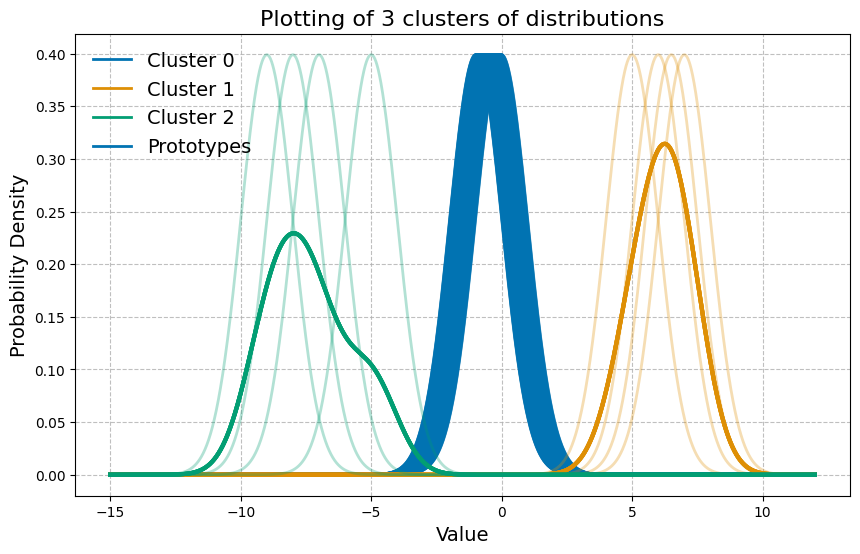

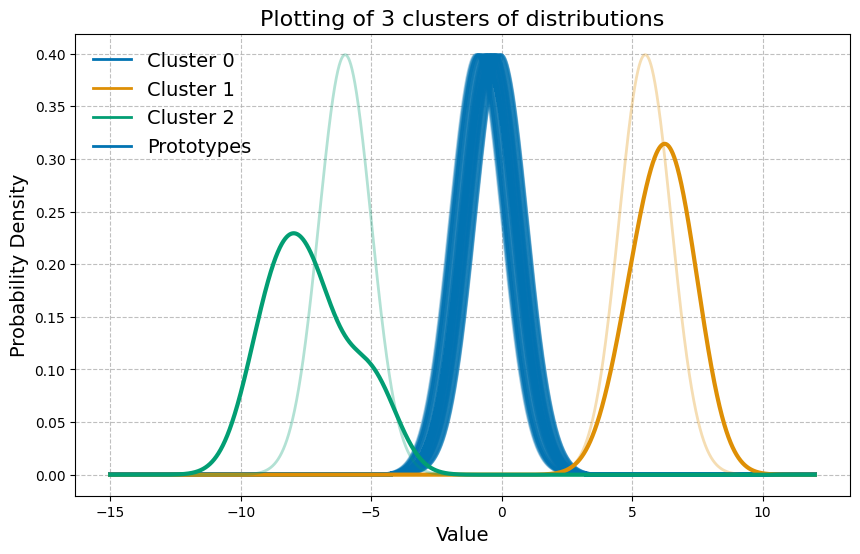

In [8]:
params = {
    'numClust': 3,                
    'maxIter': 100,               
    'mFuzzy': 2.0,                
    'epsilon': 1e-9,              
    'h': grid[1] - grid[0],                 
    'random_state': 15,          
    'verbose': True,              
    'distance': DistanceOptions.bc, 
    'thetaIni': 'overlap',        
    'verbose': True,
}

ifcm = IFCM(**params)
ifcm.fit(train_df)

plotIDX(train_df, ifcm.theta, ifcm.defuzzication(train_df), grid)

plotIDX(test_df, ifcm.theta, ifcm.predict(test_df), grid)


Iteration count = 1, obj. fcm = 34.820264
Iteration count = 2, obj. fcm = 34.716168
Iteration count = 3, obj. fcm = 34.623793
Iteration count = 4, obj. fcm = 34.569512
Iteration count = 5, obj. fcm = 34.532287
Iteration count = 6, obj. fcm = 34.506175
Iteration count = 7, obj. fcm = 34.487725
Iteration count = 8, obj. fcm = 34.474659
Iteration count = 9, obj. fcm = 34.465380
Iteration count = 10, obj. fcm = 34.458766
Iteration count = 11, obj. fcm = 34.454047
Iteration count = 12, obj. fcm = 34.450683
Iteration count = 13, obj. fcm = 34.448282
Iteration count = 14, obj. fcm = 34.446562
Iteration count = 15, obj. fcm = 34.445323
Iteration count = 16, obj. fcm = 34.444424
Iteration count = 17, obj. fcm = 34.443765
Iteration count = 18, obj. fcm = 34.443279
Iteration count = 19, obj. fcm = 34.442916
Iteration count = 20, obj. fcm = 34.442644
Iteration count = 21, obj. fcm = 34.442437
Iteration count = 22, obj. fcm = 34.442279
Iteration count = 23, obj. fcm = 34.442158
Iteration count = 24

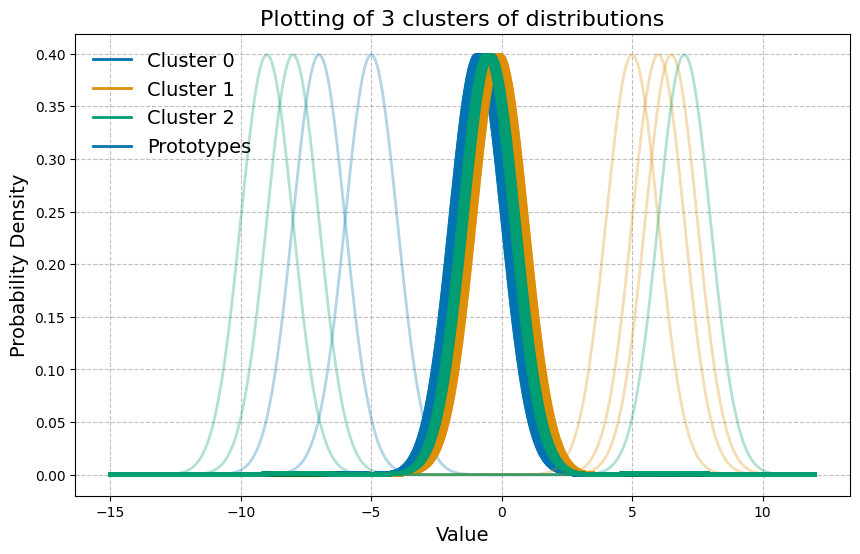

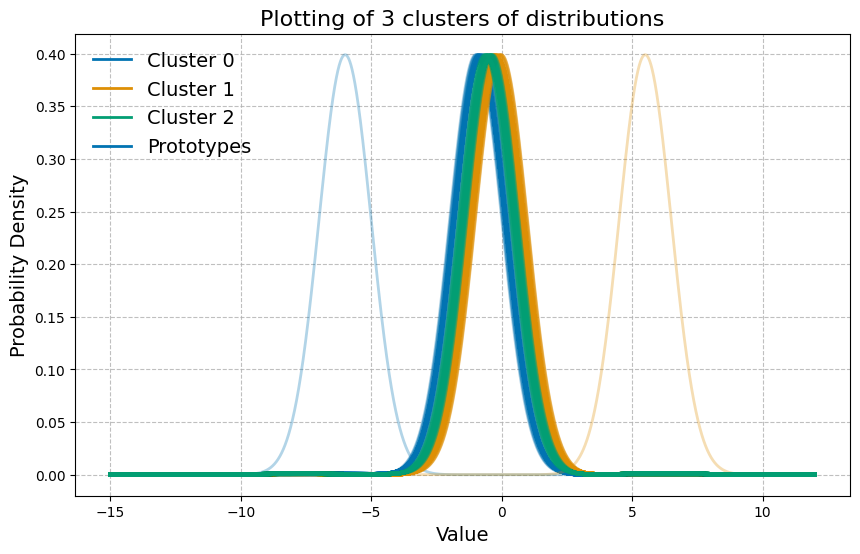

In [9]:
params = {
    'numClust': 3,                
    'maxIter': 500,               
    'mFuzzy': 2.0,                
    'epsilon': 1e-9,              
    'h': grid[1] - grid[0],                 
    'random_state': 15,          
    'verbose': True,              
    'distance': DistanceOptions.l1, 
    'thetaIni': 'kmeans++',        
    'verbose': True,
}

fcm = FCM(**params)
fcm.fit(train_df)

plotIDX(train_df, fcm.theta, fcm.defuzzication(train_df), grid)
plotIDX(test_df, fcm.theta, fcm.predict(test_df), grid)


Training Time: 3.861623764038086 with 15 iterations


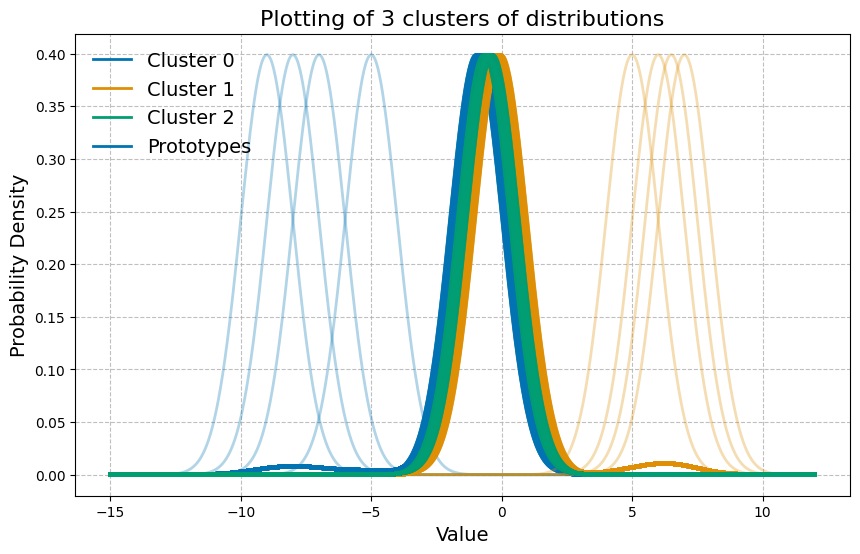

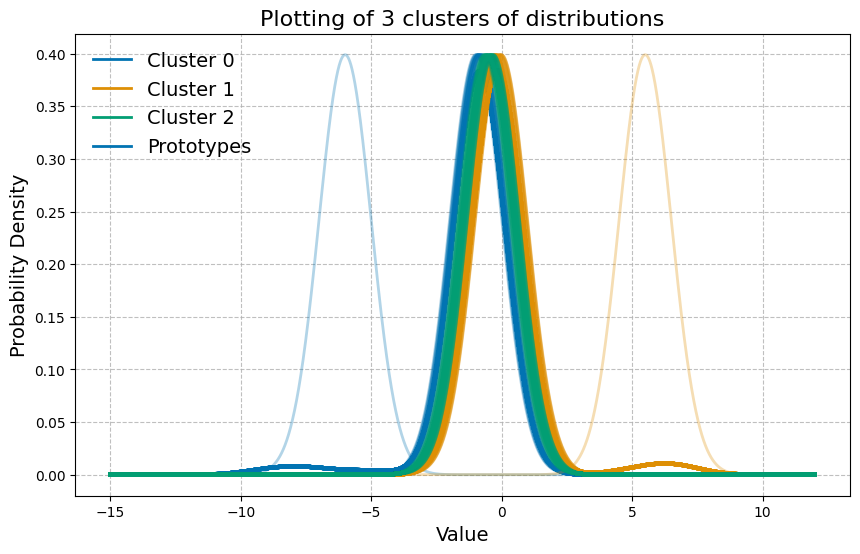

In [10]:
params = {
    'numClust': 3,                
    'maxIter': 100,               
    'mFuzzy': 2.0,                
    'epsilon': 1e-9,              
    'h': grid[1] - grid[0],                 
    'random_state': 15,          
    'verbose': True,              
    'distance': DistanceOptions.l1, 
    'thetaIni': 'kmeans++',        
    'verbose': True,
}

km = KMEAN(**params)
km.fit(train_df)

plotIDX(train_df, km.theta, km.U, grid)
plotIDX(test_df, km.theta, km.predict(test_df), grid)
